# Multi variable Linear Regression

Relation between price of a house to several of its features

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [6]:
# Preprocessing Input data
data = pd.read_csv('Housing.csv', low_memory = False)
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Correlation

In [7]:
data.corr() # correlation matrix

/var/folders/1_/q_r_wcxx3pb2w8n_r2vpk2fr0000gn/T/ipykernel_97936/3290875619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # correlation matrix


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


# Feature Selection

In [8]:
X = data[["area", "bedrooms", "bathrooms", "stories", "parking"]]
Y = data[["price"]]

# Understanding Data

Text(0, 0.5, 'price')

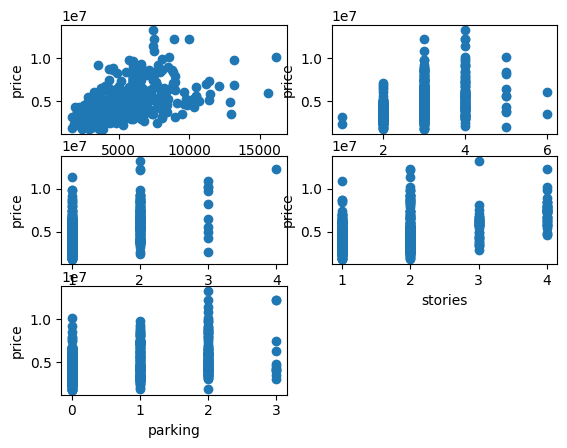

In [9]:
# Create two subplots
plt.subplot(3, 2, 1)
plt.scatter(X["area"],Y)
plt.xlabel("area")
plt.ylabel("price")

plt.subplot(3, 2, 2)
plt.scatter(X["bedrooms"],Y)
plt.xlabel("bedrooms")
plt.ylabel("price")

plt.subplot(3, 2, 3)
plt.scatter(X["bathrooms"],Y)
plt.xlabel("bathrooms")
plt.ylabel("price")

plt.subplot(3, 2, 4)
plt.scatter(X["stories"],Y)
plt.xlabel("stories")
plt.ylabel("price")

plt.subplot(3, 2, 5)
plt.scatter(X["parking"],Y)
plt.xlabel("parking")
plt.ylabel("price")


In [6]:
# X = data[["area"]]

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Normalization

In [9]:
from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler = preprocessing.StandardScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

In [10]:
X_train

array([[ 0.40616155, -1.24214968, -0.56856847, -0.92471243,  0.38554291],
       [-0.9855741 ,  1.3229399 , -0.56856847,  1.31221097,  1.55135123],
       [-0.69330961, -1.24214968, -0.56856847, -0.92471243, -0.78026541],
       ...,
       [-0.40104513,  1.3229399 ,  1.40074596,  0.19374927, -0.78026541],
       [-1.38221876,  1.3229399 ,  1.40074596, -0.92471243, -0.78026541],
       [-1.08438733,  1.3229399 ,  1.40074596,  0.19374927, -0.78026541]])

# Model Training

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [12]:
print (f"Model coeficients for features {X.columns} are {model.coef_}")

Model coeficients for features Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object') are [[0.38865787 0.06587141 0.29817435 0.25727428 0.19067515]]


Text(0, 0.5, 'price')

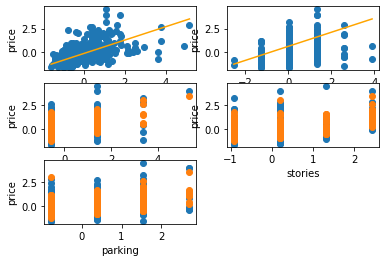

In [13]:
y_pred= model.predict(X_train)

plt.subplot(3, 2, 1)
plt.scatter(X_train[:, 0], y_train)
plt.plot([min(X_train[:, 0]), max(X_train[:, 0])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("area")
plt.ylabel("price")

plt.subplot(3, 2, 2)
plt.scatter(X_train[:, 1], y_train)
plt.plot([min(X_train[:, 1]), max(X_train[:, 1])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("bedrooms")
plt.ylabel("price")

plt.subplot(3, 2, 3)
plt.scatter(X_train[:, 2], y_train)
plt.scatter(X_train[:, 2],y_pred)
plt.xlabel("bathrooms")
plt.ylabel("price")

plt.subplot(3, 2, 4)
plt.scatter(X_train[:, 3], y_train)
plt.scatter(X_train[:, 3],y_pred)
plt.xlabel("stories")
plt.ylabel("price")

plt.subplot(3, 2, 5)
plt.scatter(X_train[:, 4], y_train)
plt.scatter(X_train[:, 4],y_pred)
plt.xlabel("parking")
plt.ylabel("price")

# Model Testing: Training data

In [14]:
MSE = metrics.mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.419723
RMSE,0.647860


# Model Testing: Testing data

In [15]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred= model.predict(X_test)

In [16]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.447733
RMSE,0.669128


In [17]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5081368237777137

# Interpreting Predicting Values

In [18]:
y_pred

array([[ 2.66026591e-01],
       [ 6.71411897e-01],
       [ 3.95030322e-01],
       [ 4.54567395e-01],
       [-4.35318399e-01],
       [-5.79345403e-01],
       [ 1.36153133e+00],
       [-4.04926263e-01],
       [-8.28422924e-01],
       [ 5.96308488e-01],
       [-2.81035167e-01],
       [ 7.99756413e-01],
       [-3.84877533e-01],
       [ 6.09517859e-02],
       [ 2.99685130e-01],
       [ 2.44514394e-01],
       [ 8.77546079e-01],
       [ 1.05475762e+00],
       [-9.05693842e-01],
       [-5.56898764e-01],
       [ 1.08645000e-01],
       [-4.38158155e-01],
       [ 3.40939421e-01],
       [-3.19968451e-01],
       [-8.42847165e-01],
       [-8.03808541e-02],
       [-5.62295689e-01],
       [-6.57327538e-01],
       [-6.16398756e-01],
       [ 1.14346391e-01],
       [ 1.37170737e+00],
       [-5.64370259e-01],
       [ 5.84089103e-01],
       [-8.92262353e-01],
       [ 1.97837449e-01],
       [-7.05557507e-01],
       [-6.93837812e-01],
       [ 1.37525927e+00],
       [-6.4

In [19]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[5228052.89731124],
       [5995585.4963848 ],
       [5472300.94332272],
       [5585024.9209205 ],
       [3900167.70698128],
       [3627475.48251981],
       [7302216.87748202],
       [3957710.38355829],
       [3155886.81256312],
       [5853389.13728529],
       [4192278.46875738],
       [6238585.42335082],
       [3995669.46577144],
       [4839776.3703311 ],
       [5291779.9856768 ],
       [5187322.97336453],
       [6385867.78414169],
       [6721389.64784292],
       [3009586.61979336],
       [3669974.62346927],
       [4930075.88535383],
       [3894791.08056339],
       [5369888.42463878],
       [4118564.48819217],
       [3128576.80758074],
       [4572185.49566194],
       [3659756.40448811],
       [3479828.71377942],
       [3557320.85291694],
       [4940870.56292413],
       [7321483.58991796],
       [3655828.53696753],
       [5830253.67470596],
       [3035017.00762883],
       [5098947.60128531],
       [3388512.93892394],
       [3410702.31797213],
 

fhjdssjgf